In [1]:
import json as json
import pprint as pp
from operator import itemgetter
from copy import deepcopy

bgcolor='#002b36'
#002b36
bgcolor='#fdf6e3'
drawcolor='#93a1a1'
drawcolor='#586e75'

mycolors = ['#b58900', '#268bd2', '#d33682', '#d30102','#6c71c4', '#cb4b16','#2aa198'] #, '#859900']


All submissions < 4 seconds are bogus since the attack starts at 4

In [2]:
all_submissions=[]
no_time=[]
results=[]
fast_submit=[]


with open("processed_results.txt") as f:
        all_submissions = json.load(f, encoding='utf8')

results = [ r for r in all_submissions if r['counters']['all_changes'] > 0]
no_ops = [ r for r in all_submissions if r['counters']['all_changes'] == 0]
fast_submit=[ r for r in all_submissions if r['time'] < 4 ]

results = [r for r in results if r not in fast_submit and r['time']] #last one is a duplicate same user


results = sorted(results, key=itemgetter('rev'), reverse=True) #sort results based on revenue

print("all:", len(all_submissions))

print("results:", len(results))
print("No changes applied:",len(no_ops))

all: 48
results: 36
No changes applied: 11


We have only 10 valid results that recorded the runtime.

Now we compare the results with the base topologies and see what has changed:

In [3]:
%matplotlib inline

def draw_change_plot(net_type, filename=None):
    import matplotlib.pyplot as plt
    from numpy import nan
    # bgcolor='#002b36'
    # drawcolor='#93a1a1'
    if net_type > 0:
        res=[r for r in results if r['net_type'] == net_type]
    else:
        res=[r for r in results]
        
    x = [r['rev'] for r in res]
    y = [r['counters']['all_changes'] or nan for r in res] 
    y1 = [r['counters']['state_changes'] or nan for r in res] 
    y2 = [r['counters']['filter_changes'] or nan for r in res] 
    y3 = [r['counters']['rateup'] or nan for r in res] 
    y4 = [r['counters']['ratedown'] or nan for r in res]
    fig = plt.figure(facecolor=bgcolor)
    ax = fig.add_subplot(111,axisbg=bgcolor)
    
    for spine in ax.spines.values():
        spine.set_color(drawcolor)
    ax.title.set_color(drawcolor)


    ax.yaxis.label.set_color(drawcolor)
    ax.xaxis.label.set_color(drawcolor)
    ax.tick_params(axis='x', colors=drawcolor)
    ax.tick_params(axis='y', colors=drawcolor)
    size = 60
    colors = deepcopy(mycolors)
    fig.subplots_adjust(top=0.85)
    ax.set_xlabel('revenue recovered in %')
    ax.set_ylabel('amount of changes')
    plt.scatter(x, y, c=colors.pop(), s=size, marker='o')
    plt.scatter(x,y1 ,color=colors.pop(), s=40, marker='s' )
    plt.scatter(x,y2,color=colors.pop(), s=40, marker='*' )
    plt.scatter(x,y3,color=colors.pop(), s=40, marker='^')
    plt.scatter(x,y4,color=colors.pop(), s=40, marker='v')
    keys = ["all_changes", "state_changes", "filter_changes", "rateup_changes", "ratedown_changes"]    
    lgnd = plt.legend(['total','state','filter', 'up', 'down'], loc=2, bbox_to_anchor=(1.01,1) , borderaxespad=0.10)
    frame = lgnd.get_frame()
    frame.set_facecolor('none')
    frame.set_edgecolor('none')
    for text in lgnd.get_texts():
        text.set_color(drawcolor)
    if filename: 
        plt.savefig(filename, format='pdf', transparent=True, bbox_inches = 'tight')
    plt.show()

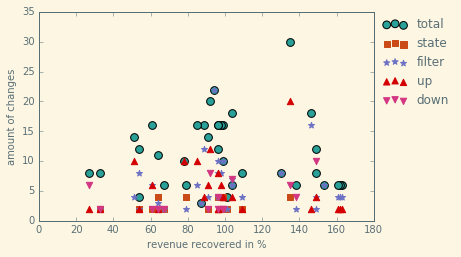

In [4]:
%matplotlib inline  
draw_change_plot(0, "rev_change_combined.pdf")

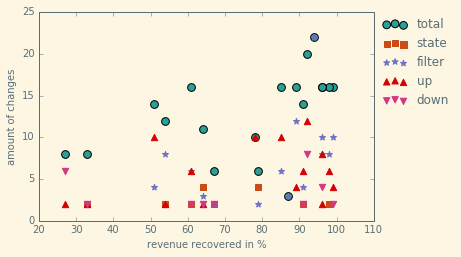

In [5]:
%matplotlib inline  
draw_change_plot(1,"rev_change_s1.pdf")

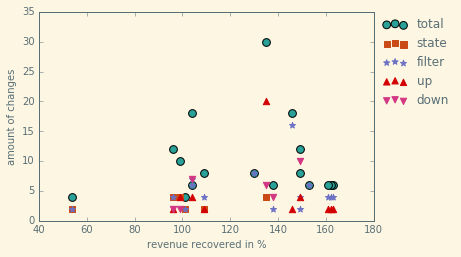

In [6]:
%matplotlib inline  
draw_change_plot(2,"rev_change_s2.pdf")

In [7]:
%matplotlib inline  
import matplotlib.pyplot as plt
from numpy import nan

def draw_rev_plot(net_type, filename=None):
    markers='o'

    if net_type > 0:
        res=[r for r in results if r['net_type'] == net_type]
    else:
        res=[r for r in results]
    
    res=[r for r in results if r['net_type'] == 1]
    x = [r['rev'] for r in res]
    y = [r['cost_ratio'] for r in res]

    res=[r for r in results if r['net_type'] == 2]
    x2 = [r['rev'] for r in res]
    y2 = [r['cost_ratio'] for r in res]
    
    size = 60
    colors = deepcopy(mycolors)
    import itertools

    marker = itertools.cycle(markers)
    fig = plt.figure(facecolor=bgcolor)
    ax = fig.add_subplot(111,axisbg=bgcolor)
    fig.subplots_adjust(top=0.85)

    for spine in ax.spines.values():
        spine.set_color(drawcolor)
    ax.title.set_color(drawcolor)

    ax.set_xlabel('revenue compared to baseline %')
    ax.set_ylabel('costs compared to baseline in %')
    ax.yaxis.label.set_color(drawcolor)
    ax.xaxis.label.set_color(drawcolor)
    ax.tick_params(axis='x', colors=drawcolor)
    ax.tick_params(axis='y', colors=drawcolor)
    plt.scatter(x, y, c=colors.pop(), s=size, marker='o')
    plt.scatter(x2, y2, c=colors.pop(), s=size, marker='s')
    lgnd = plt.legend(['scenario 1', 'scenario 2'], loc=2, bbox_to_anchor=(1.01,1) , borderaxespad=0.10, frameon = 1)
    frame = lgnd.get_frame()
    frame.set_facecolor('none')
    frame.set_edgecolor('none')
    for text in lgnd.get_texts():
        text.set_color(drawcolor)
    if filename: 
        plt.savefig(filename, format='pdf', transparent=True, bbox_inches = 'tight')
    plt.show()

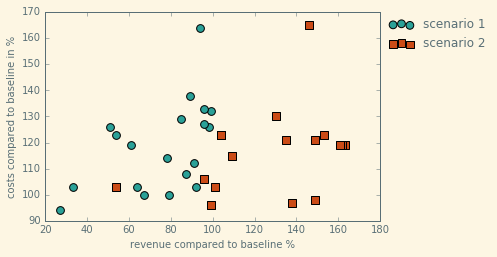

In [8]:
draw_rev_plot(0,"rev_costs_combined.pdf")

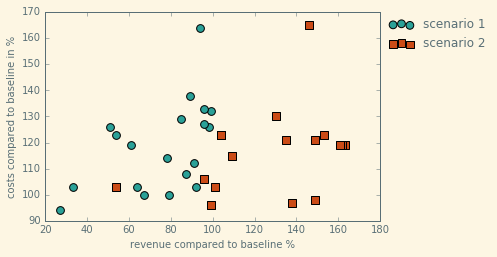

In [9]:
draw_rev_plot(1,"rev_costs_s1.pdf")

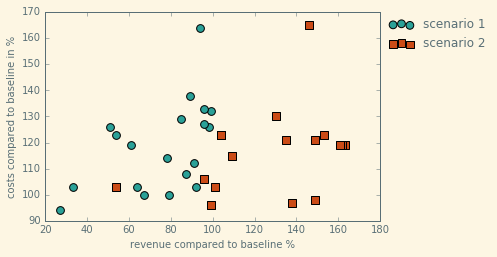

In [10]:
draw_rev_plot(2,"rev_costs_s1.pdf")

In [11]:
import numpy
from scipy.stats import pearsonr, f_oneway, linregress

res=[r for r in results if r['net_type'] == 1]
list1 = [r['rev'] for r in res]
list2 = [r['cost_ratio'] for r in res]
print("correlation 1:", pearsonr(list1, list2))


res=[r for r in results if r['net_type'] == 2]
list1 = [r['rev'] for r in res]
list2 = [r['cost_ratio'] for r in res]
print("correlation 2:", pearsonr(list1, list2))

res=[r for r in results]
list1 = [r['rev'] for r in res]
list2 = [r['cost_ratio'] for r in res]
print("correlation total:", pearsonr(list1, list2))

#res=[r for r in results]
res=[r for r in results if r['net_type'] == 2]
list1 = [float(r['revenue']) for r in res]
list2 = [r['counters']['filter_changes'] for r in res]

correlation 1: (0.51085907897094629, 0.025404248614261816)
correlation 2: (0.35577258599329892, 0.16106070016528645)
correlation total: (0.25350195594950686, 0.13574538904060257)


In [12]:
from results import *
from pprint import pprint
samples1=[]
samples2=[]
samples=samples1

for result in results:
    if 'samples' in result.keys():
        if result['_0_init'] == "2015-11-18T16:19:42.764Z":
            samples=samples2
        samples += result['samples']
print(len(samples))

samples1 = [float(s) for s in samples1]
samples2 = [float(s) for s in samples2 if int(float(s)) > 0]


234


187.513379


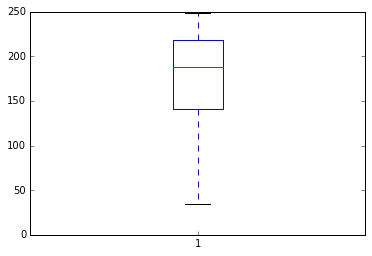

153.06495


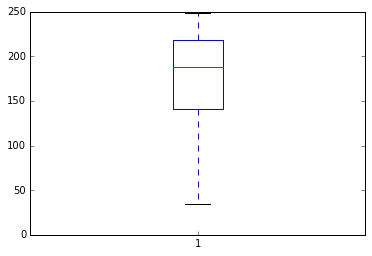

In [13]:
plt.figure()
from statistics import median, median_high
print(median_high(samples1))
plt.boxplot(samples1)
plt.show()
print(median(samples2))
plt.figure()
plt.boxplot(samples1)
plt.show()

In [17]:
import pickle
import numpy as np
from statistics import stdev, variance
from math import sqrt
import itertools
results = None
with open('/Users/ralph/doc/phd/results/results.pickle', 'rb') as df:
        results=pickle.load(df)

with open('/Users/ralph/doc/phd/results/sc15-results.pickle', 'rb') as df:
        sc15_import=pickle.load(df)

def bplot(means, err, sc15=None, xvals=None, filename=None):
    fig = plt.figure(facecolor=bgcolor)
    ax = fig.add_subplot(111,axisbg=bgcolor)
    colors=deepcopy(mycolors)

    fig.subplots_adjust(top=0.85)

    for spine in ax.spines.values():
        spine.set_color(drawcolor)
    ax.title.set_color(drawcolor)

    ax.set_xlabel('solution for scenario 2')
    ax.set_ylabel('absolute revenue')
    ax.yaxis.label.set_color(drawcolor)
    ax.xaxis.label.set_color(drawcolor)
    ax.tick_params(axis='x', colors=drawcolor)
    ax.tick_params(axis='y', colors=drawcolor)
    if xvals:
        ax.set_xticks([x + 0.5 for x in range(0,len(means))])
        ax.set_xticklabels(xvals , rotation='vertical')
    # print(len(stdevs), len(means))
    width=0.9

    rects1 = ax.bar(np.arange(len(means)), means, width,
                    color=colors.pop(),
                    yerr=stdevs,
                    error_kw=dict(elinewidth=2,ecolor=colors.pop()))
    width=0.2
    if sc15:
        rects1 = ax.bar(np.arange(len(means))+0.35, sc15, width,
                        color=colors.pop())
    lgnd = plt.legend(['mean', 'sc15'], loc=2, bbox_to_anchor=(1.01,1) , borderaxespad=0.10, frameon = 1)
    frame = lgnd.get_frame()
    frame.set_facecolor('none')
    frame.set_edgecolor('none')
    for text in lgnd.get_texts():
        text.set_color(drawcolor)
    if filename: 
        plt.savefig(filename, format='pdf', transparent=True, bbox_inches = 'tight')
    plt.show()

In [18]:
from collections import OrderedDict
rsult = OrderedDict([('ae936a28139a686085a9f9fe0b893675', [49.054043125, 48.9820505, 51.35036724999999, 51.478465125, 49.353332625, 48.135636999999996, 49.414331250000004, 50.388158499999996, 48.726721999999995, 47.635869375000006, 49.66651962499999, 50.726312750000005, 48.104664875, 48.634985375, 47.979259875, 49.355593125, 49.97856, 50.695360750000006, 47.886226125, 50.666935249999995, 49.56953275, 47.41524425, 49.44460325, 50.72645299999999, 49.010488374999994]), ('d16e6a331d45d3803c9d2d55720d5c7f', [18.084554125, 17.7734664, 17.8995062125, 19.928096525, 15.4305687, 20.178273925, 18.867107299999997, 19.023249175, 16.241556, 18.0222326125, 17.929887875000002, 18.929964525000003, 15.6486419125, 19.117067050000003, 18.491651049999998, 19.897922150000003, 19.147519374999998, 16.43035855, 21.490387650000002, 17.367245125, 17.305818849999998, 18.3668291125, 18.491290900000003, 19.2100224, 19.1468160625]), ('6e2382a527d6266dfbc0ca4a5e116d21', [26.737631500000006, 55.19479462499999, 29.453593562500004, 57.000704750000004, 29.765155749999998, 53.820035875, 25.804730499999998, 55.22322075000001, 26.237211675, 55.84926850000001, 26.425427, 53.067133749999996, 25.297785124999997, 55.661130500000006, 26.17100275, 54.09916725000001, 28.672209, 55.257692625, 22.6139021625, 57.938033999999995, 25.144138250000005, 55.97778037500001, 27.804048625, 55.59934025, 29.892744875, 55.688783375, 27.581256425000003, 55.53734075, 26.894928425, 52.975163124999995, 30.796248062500002, 55.565673874999995, 25.05113, 55.0924885, 29.7376385375, 56.22484275, 28.387796125, 54.69852850000001, 29.32952625, 56.56910875, 31.73419275, 56.13032887499999, 26.736783650000003, 56.78570025, 26.550283625, 53.6917845, 26.116854175000004, 56.941894500000004, 28.917399062499996, 55.005078749999996]), ('cc7232bc04acce9d3ee09e6eaaf97c28', [80.589154625, 83.373912125, 75.52578275, 81.846231125, 77.95207349999998, 77.5218965, 79.629937, 81.95338562500001, 79.44884775000001, 80.307579, 79.49541124999999, 80.48531937499999, 77.67792462500002, 79.040779875, 80.09672775, 78.19215062500001, 78.74534962499999, 75.86227887499999, 78.77064387500002, 76.708590875, 78.2516445, 80.023004375, 78.2654075, 81.20412962500001, 84.548029125]), ('674f31346b837d5339ab85fd5ea022f5', [80.89625724999999, 77.903071, 79.54770425, 80.96431874999999, 80.96504374999999, 81.678999125, 78.71698699999999, 80.89971974999999, 80.067409625, 79.809867, 77.748754625, 80.590871125, 76.67704612499999, 78.371502875, 77.9044275, 80.53107875, 80.52770212499999, 81.46191749999998, 79.93087862499999, 78.18517500000002, 79.499087625, 79.87142924999999, 77.498970125, 80.40113825, 77.59151525]), ('ae0dfd61546ec98c740e79820290f0ea', [151.01696899999996, 151.60436749999997, 151.1351365, 148.11240625, 149.4553925, 149.78619275000003, 148.03013800000002, 150.96856725, 149.04790975, 150.0519275, 148.05667875, 150.055933, 148.93356999999997, 148.85568675, 150.33586400000002, 149.97713149999998, 149.616271, 149.23839312500002, 147.29942375, 150.073883, 151.63951175, 151.187016375, 147.55777975, 148.86503274999998, 148.05090775]), ('187cdd0655fa539ba73bfc6777ec2542', [196.62559224999998, 197.73982525, 197.17343749999998, 196.40477574999997, 197.4799675, 197.02240125000003, 196.74952662500002, 198.06854575000003, 198.04003425000002, 198.15677187499998, 195.90414374999997, 196.249324, 198.33136475, 196.98361925, 197.841166875, 198.87082237500002, 199.09571000000003, 198.59595287500002, 197.32556749999998, 197.31431125, 198.31802274999998, 198.18594275, 196.79438324999998, 197.3580125, 197.40672124999995]), ('6f1e0e7a690aae61b6951c619a3edaa5', [238.24611875, 217.07414499999996, 236.43077375, 219.13559, 217.65768187500004, 236.804001, 238.80519975, 237.93531499999997, 236.1449825, 219.80850812500003, 236.6356635, 234.65816750000002, 234.51453375000003, 216.68029474999997, 234.07912625, 219.52854874999997, 236.79725575000003, 216.11938924999998, 218.846453125, 240.49379625000003, 236.015366, 224.22949125000002, 235.26054375, 219.50991725, 221.185416]), ('38d1ac9b11c923e424eadd18024ad2b9', [214.39234, 213.112536, 215.26843875000003, 213.528678, 218.82065699999998, 216.83192025, 217.63968549999998, 224.35982950000002, 221.844501875, 218.08176625, 216.32101250000002, 219.05558025, 219.946964, 214.59552275000004, 220.33385699999997, 218.12787299999997, 218.2695735, 215.88929474999998, 219.70126000000002, 217.6436415, 217.40274724999998, 215.110921625, 220.8084455, 215.54987875, 216.04823674999997]), ('c5394fb4721a86ac4fa4e357b995a862', [212.860474, 210.56774825, 215.90408125000002, 213.53193199999998, 218.18946375000002, 217.66350474999996, 216.14929025000004, 218.06560575000003, 213.222023, 214.229587875, 218.693825, 191.04147050000003, 218.262004, 211.56744275, 215.84368049999998, 216.1984025, 190.66419875000003, 209.91858974999997, 219.200455375, 213.31475700000001, 211.0971385, 212.36226249999999, 195.31189162500004, 217.97298562500004, 216.39396625]), ('b8db1b0d7f8e50a095a419b7e0f04134', [216.86015125, 233.16548624999996, 217.82891675000002, 235.09283999999997, 237.10305662500002, 217.478363, 221.45631375, 220.158785, 219.44934125, 235.855145, 220.5230275, 224.100441125, 218.325639, 235.142985, 215.366920875, 237.89187025000004, 217.333746, 236.734230625, 235.18004875000003, 219.4440725, 222.39040824999995, 240.39037749999997, 223.755026, 242.72348125000002, 237.732105]), ('d12b6f792311511fdc10d00acb9b2330', [206.32064812500002, 220.989036, 203.94894625, 221.74129975, 223.32172975, 207.38393125, 210.193440625, 205.73623462499998, 204.936228375, 221.22396275, 211.898595625, 204.88067, 201.75438900000003, 219.31589325, 208.13052099999996, 222.36624875, 212.2351745, 217.845415, 219.67501374999995, 209.818451625, 213.40695775000003, 220.18182324999998, 203.77000149999998, 217.96633425, 221.43799649999997]), ('5fa1f27e7d2f5b9b1755b1290574e15e', [161.63012975, 159.98116000000002, 158.92339400000003, 159.17055725, 163.224659, 161.7387665, 161.38750599999997, 159.01547475, 162.79885775, 160.86641500000002, 160.36491274999997, 164.55112575, 163.3546675, 162.689326, 161.4169705, 163.15422625000002, 162.63362725000002, 163.6338675, 157.76956525, 155.898101, 162.800723375, 159.72875825, 161.012905, 163.813298875, 162.29335700000001]), ('ed48788923d6c693234a935c351918f9', [216.68254375, 217.41687525, 219.963636, 218.17535675, 217.3557955, 221.71669874999998, 217.17496200000002, 220.59192750000003, 221.564780875, 217.09012274999998, 224.57081124999996, 219.23722750000002, 221.92674925000003, 221.62787975, 215.89704450000002, 220.67219674999998, 220.14579562500003, 220.53184875000002, 216.15402312499998, 216.68095449999998, 220.48086949999998, 218.262816, 220.640678, 219.819179375, 221.77837325000002]), ('728e9e46d639ccbdd66762f1c299a2a3', [210.87936562500002, 208.640824, 213.9834975, 217.04132275, 209.68037087500002, 216.99393575, 215.98110849999998, 215.90426775, 214.8351685, 216.37373025, 208.85001724999998, 211.195854, 213.579610375, 215.419307625, 209.75126225, 213.21183525000004, 216.379263125, 213.401413, 214.31397187500002, 215.808119375, 207.17215275, 213.58269462500004, 210.77031875, 215.59281025, 209.479056625]), ('4e4c8a690afd4bccf7dc2e3be5027871', [116.31993375000002, 108.82316349999999, 99.34432325000002, 80.27241599999999, 95.71432187500001, 64.74623712500001, 124.47021274999999, 101.11194025, 77.11843562499999, 92.920814, 64.18441837499999, 119.4713715, 95.01974762499998, 84.642442375, 89.04698900000001, 65.310327625, 118.28049575, 99.9297655, 80.49391175000001, 95.57324883749999, 59.864996874999996, 119.94151075000002, 102.103039125, 82.95426825000001, 95.4230126875, 58.71921545000001, 130.338044, 100.423819125, 82.30464287500001, 93.568574, 71.08165707500001, 115.87470099999999, 94.32399825, 81.38856775, 90.12688224999998, 63.70542987499999, 115.632555375, 93.48415849999999, 84.11507512499999, 89.702367875, 60.467817124999996, 111.2817, 96.1402625, 76.73783475, 91.60884312499998, 54.601977075, 120.84029000000001, 97.219881875, 83.631887, 90.75068575, 63.46756399999999, 120.45896624999999, 101.69852475, 80.07886775, 90.29954425, 68.428359425, 114.94380924999999, 97.2628, 83.46318399999998, 97.80407100000001, 69.70254025, 109.44954324999999, 97.01359900000001, 79.648800125, 97.69447579999999, 64.841570275, 114.42058125, 96.41759775000001, 79.646260375, 92.4530085, 60.589033875, 118.18444825, 93.55653799999997, 80.742557375, 97.58928825000001, 66.03504077500001, 120.46997525, 94.25057637500001, 98.17346675, 91.984547375, 63.36989117499999, 113.34273075000002, 100.733072625, 85.98548149999999, 94.48014020000001, 60.660407000000006, 120.46209062500003, 97.62042550000001, 87.4120695, 97.7580405, 64.960314, 123.234447125, 104.317527375, 79.18009575, 93.699671, 63.093748925, 122.60572512499999, 101.845126625, 73.62020375, 92.67923524999999, 65.50878841250001, 113.60358743750001, 97.674359875, 73.09030274999999, 102.07245912500001, 65.7675215, 118.947840625, 91.71817487499999, 79.898665625, 92.76158475000001, 63.8137116875, 123.34266187499999, 99.8564625, 79.65273225000001, 98.81468437499998, 67.974824, 118.87792275, 98.87769062500001, 76.425118625, 92.65022975, 68.1209848, 116.48957275000001, 99.37526424999999, 82.744575875, 85.95287925000001]), ('aa884da2c5cabe80cebf05b17454205f', [89.55590825, 91.86471650000001, 90.26254575, 88.705512, 88.689276125, 90.986855125, 89.429829875, 88.64248074999999, 90.39226675, 92.043683625, 89.1113745, 92.5470915, 86.72980799999999, 91.27918162499999, 89.61313737500001, 94.79743375000001, 93.08899500000001, 87.42158375, 93.45410474999998, 91.164728875, 85.020143125, 90.461780625, 87.180653625, 91.45792375, 91.08570049999999]), ('dd2fe56ede143fd1bc7dc49c0d43dd81', [144.89904375, 145.50564275, 142.41696437500002, 142.684516, 141.42486037499998, 143.860272875, 142.8051145, 143.7064, 144.16779524999998, 144.20851174999999, 141.681513, 146.04909099999998, 142.652779375, 143.393119, 143.610213375, 143.97185274999998, 143.42544249999997, 142.76398725, 142.82785287500002, 142.51066275, 140.8057195, 143.38132399999998, 143.403627125, 142.89127262499997, 144.95076949999998])])
means = []

rsult2=OrderedDict()

for k, v in rsult.items():
    if len(v) > 25:
        l=int(len(v)/25)
        for i in range(l):
            rsult2['{}_{}'.format(k, i)]=v[i::l]
    else: 
        rsult2[k]=v
        
    
for k, v in rsult2.items():
    means.append(int(sum(v)/len(v)))
awesomemeans=means
len(means)
#t025=stats.t.ppf(.025, 25)
#stdevs = [t025*stdev(r['rev'])/sqrt(len(r['rev'])) for r in results.values()]

23

23
[215.39377375, 211.062357625, 214.330939375, 212.93045625, 215.449444375, 217.09551725, 208.70782525, 209.89669125000003, 208.5385705, 201.75997750000002, 196.649385, 191.08705874999995, 203.64495825, 206.3097775, 196.98337525, 214.1698315, 210.57116025000002, 198.5123285, 210.03988637500004, 201.64351775, 201.627980375, 198.387416, 209.477066375, 201.70765375, 183.91997825]
samples 22 t .025 =  -2.05953855275


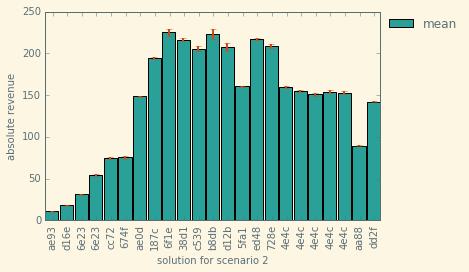

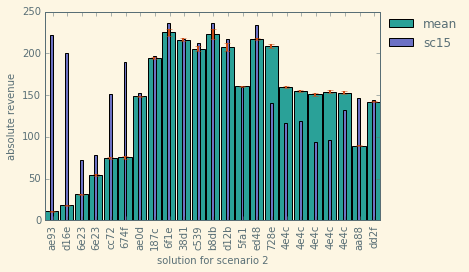

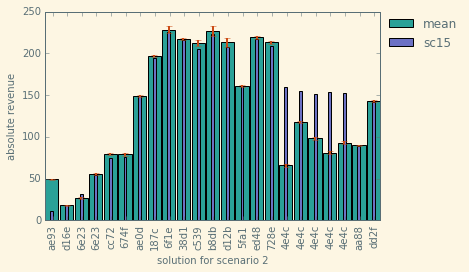

In [32]:
from scipy import stats
from collections  import OrderedDict
    
means = [r['avg_rev'] for r in results.values()]
print(len(means))
sc15 = [r['avg_rev']+5 for r in results.values()]
xvals =[r['user'][:4] for r in results.values()]
meuk=[['ae936a28139a686085a9f9fe0b893675', 48.382541499999995], ['d16e6a331d45d3803c9d2d55720d5c7f', 18.42911025], ['6e2382a527d6266dfbc0ca4a5e116d21', 32.3908448125], ['6e2382a527d6266dfbc0ca4a5e116d21', 40.324623875], ['cc7232bc04acce9d3ee09e6eaaf97c28', 65.281705375], ['674f31346b837d5339ab85fd5ea022f5', 57.09834825000001], ['ae0dfd61546ec98c740e79820290f0ea', 174.6308765], ['187cdd0655fa539ba73bfc6777ec2542', 173.51061750000002], ['6f1e0e7a690aae61b6951c619a3edaa5', 183.06475525000002], ['38d1ac9b11c923e424eadd18024ad2b9', 175.53141349999999], ['c5394fb4721a86ac4fa4e357b995a862', 179.18558137499997], ['b8db1b0d7f8e50a095a419b7e0f04134', 159.48013225], ['d12b6f792311511fdc10d00acb9b2330', 169.48433], ['5fa1f27e7d2f5b9b1755b1290574e15e', 189.65214650000001], ['ed48788923d6c693234a935c351918f9', 183.26257749999996], ['728e9e46d639ccbdd66762f1c299a2a3', 197.65153274999997], ['4e4c8a690afd4bccf7dc2e3be5027871', 158.5238095], ['4e4c8a690afd4bccf7dc2e3be5027871', 160.72539824999998], ['4e4c8a690afd4bccf7dc2e3be5027871', 149.86064224999998], ['4e4c8a690afd4bccf7dc2e3be5027871', 159.0638545], ['4e4c8a690afd4bccf7dc2e3be5027871', 149.50869037500001], ['aa884da2c5cabe80cebf05b17454205f', 86.449713625], ['dd2fe56ede143fd1bc7dc49c0d43dd81', 135.2407225]]
meuk=[['ae936a28139a686085a9f9fe0b893675', 46.846860250000006], ['d16e6a331d45d3803c9d2d55720d5c7f', 18.584798325], ['6e2382a527d6266dfbc0ca4a5e116d21', 26.267460874999998], ['6e2382a527d6266dfbc0ca4a5e116d21', 44.225297749999996], ['cc7232bc04acce9d3ee09e6eaaf97c28', 63.032741249999994], ['674f31346b837d5339ab85fd5ea022f5', 50.382613375000005], ['ae0dfd61546ec98c740e79820290f0ea', 176.46747725], ['187cdd0655fa539ba73bfc6777ec2542', 177.69911524999998], ['6f1e0e7a690aae61b6951c619a3edaa5', 173.29837775], ['38d1ac9b11c923e424eadd18024ad2b9', 180.614596], ['c5394fb4721a86ac4fa4e357b995a862', 172.233204], ['b8db1b0d7f8e50a095a419b7e0f04134', 164.0962835], ['d12b6f792311511fdc10d00acb9b2330', 164.480439625], ['5fa1f27e7d2f5b9b1755b1290574e15e', 186.72910837499998], ['ed48788923d6c693234a935c351918f9', 175.67313000000001], ['728e9e46d639ccbdd66762f1c299a2a3', 191.81860474999996], ['4e4c8a690afd4bccf7dc2e3be5027871', 157.482504], ['4e4c8a690afd4bccf7dc2e3be5027871', 162.080240875], ['4e4c8a690afd4bccf7dc2e3be5027871', 150.50577412500002], ['4e4c8a690afd4bccf7dc2e3be5027871', 162.04854825], ['4e4c8a690afd4bccf7dc2e3be5027871', 148.19405125], ['aa884da2c5cabe80cebf05b17454205f', 90.01903137500001], ['dd2fe56ede143fd1bc7dc49c0d43dd81', 134.230563]]
meuk=[['ae936a28139a686085a9f9fe0b893675', 8.5899256375], ['d16e6a331d45d3803c9d2d55720d5c7f', 18.8970962375], ['6e2382a527d6266dfbc0ca4a5e116d21', 6.7157302], ['6e2382a527d6266dfbc0ca4a5e116d21', 4.7472676525], ['cc7232bc04acce9d3ee09e6eaaf97c28', 80.23951575], ['674f31346b837d5339ab85fd5ea022f5', 83.113378875], ['ae0dfd61546ec98c740e79820290f0ea', 6.278284274999999], ['187cdd0655fa539ba73bfc6777ec2542', 1.8741230575], ['6f1e0e7a690aae61b6951c619a3edaa5', 163.99039525], ['38d1ac9b11c923e424eadd18024ad2b9', 162.8204475], ['c5394fb4721a86ac4fa4e357b995a862', 138.9954965], ['b8db1b0d7f8e50a095a419b7e0f04134', 161.853385125], ['d12b6f792311511fdc10d00acb9b2330', 147.98760349999998], ['5fa1f27e7d2f5b9b1755b1290574e15e', 81.026410375], ['ed48788923d6c693234a935c351918f9', 160.9152815], ['728e9e46d639ccbdd66762f1c299a2a3', 163.90798250000003], ['4e4c8a690afd4bccf7dc2e3be5027871', 124.90417324999999], ['4e4c8a690afd4bccf7dc2e3be5027871', 122.121795375], ['4e4c8a690afd4bccf7dc2e3be5027871', 101.5289153375], ['4e4c8a690afd4bccf7dc2e3be5027871', 122.71912887500001], ['4e4c8a690afd4bccf7dc2e3be5027871', 97.66594309874999], ['aa884da2c5cabe80cebf05b17454205f', 92.209633], ['dd2fe56ede143fd1bc7dc49c0d43dd81', 3.279491435]]
sc15 = [float(sc15_import[u]['revenue']) for u in results.keys()]
#means = [r[1] for r in meuk]
print(dict(results)['c5394fb4721a86ac4fa4e357b995a862_1']['rev'])
# sc15 = [222.34240400000002, 200.31256574999998, 78.445605875, 78.445605875, 151.02343815, 189.23741875000002, 152.23288675, 196.84872149999998, 235.896702, 217.37450899999996, 212.432524, 236.39726125, 216.652984625, 159.39112749999998, 233.951043, 140.49889124999999, 117.0610665, 117.0610665, 117.0610665, 117.0610665, 117.0610665, 146.79216762500002, 144.01444025]
t025=2.20 # 12 metingen
t025=2.09 # 20 metingen
t025=stats.t.ppf(.025, 25)
print('samples',len(means)-1, 't .025 = ', t025)
stdevs = [t025*stdev(r['rev'])/sqrt(len(r['rev'])) for r in results.values()]
stdevs
bplot(means, stdevs, xvals=xvals, filename='baseline-solar.pdf' )
bplot(means, stdevs, sc15, xvals=xvals, filename='baseline+sc-solar.pdf')
bplot(awesomemeans, stdevs, means, xvals=xvals, filename='baseline+sc-solar2.pdf')

In [ ]:
[['ae936a28139a686085a9f9fe0b893675', 14.867459775], ['d16e6a331d45d3803c9d2d55720d5c7f', 16.9292133875], ['6e2382a527d6266dfbc0ca4a5e116d21', 29.01723725], ['6e2382a527d6266dfbc0ca4a5e116d21', 55.723702], ['cc7232bc04acce9d3ee09e6eaaf97c28', 76.055563625], ['674f31346b837d5339ab85fd5ea022f5', 79.895602125], ['ae0dfd61546ec98c740e79820290f0ea', 148.1059615], ['187cdd0655fa539ba73bfc6777ec2542', 195.8391475], ['6f1e0e7a690aae61b6951c619a3edaa5', 241.43519275], ['38d1ac9b11c923e424eadd18024ad2b9', 217.95450525], ['c5394fb4721a86ac4fa4e357b995a862', 215.39377375], ['b8db1b0d7f8e50a095a419b7e0f04134', 221.491023], ['d12b6f792311511fdc10d00acb9b2330', 200.938689], ['5fa1f27e7d2f5b9b1755b1290574e15e', 160.67391750000002], ['ed48788923d6c693234a935c351918f9', 223.07785399999997], ['728e9e46d639ccbdd66762f1c299a2a3', 210.40354225], ['4e4c8a690afd4bccf7dc2e3be5027871', 158.00156399999997], ['4e4c8a690afd4bccf7dc2e3be5027871', 156.21979299999998], ['4e4c8a690afd4bccf7dc2e3be5027871', 143.52178325], ['4e4c8a690afd4bccf7dc2e3be5027871', 155.0976465], ['4e4c8a690afd4bccf7dc2e3be5027871', 150.17058000000003], ['aa884da2c5cabe80cebf05b17454205f', 89.35476512500001], ['dd2fe56ede143fd1bc7dc49c0d43dd81', 143.5834795]]


In [ ]:
from scipy import stats
print(stats.t.cdf(2.8-5, 4.6))
print(stats.t.cdf(.025, 25))
print(stats.t.ppf(.025, 25))